<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np

np.random.seed(42)

m = 100# number of instances

X = 2 *np.random.rand(m, 1) # max is <2, because 0.99999 * 2 < 2

y = 4 + 3*X + np.random.rand(m, 1)# 3*X <6 ,   5.99 +4 + 0.99 (max value prediction)

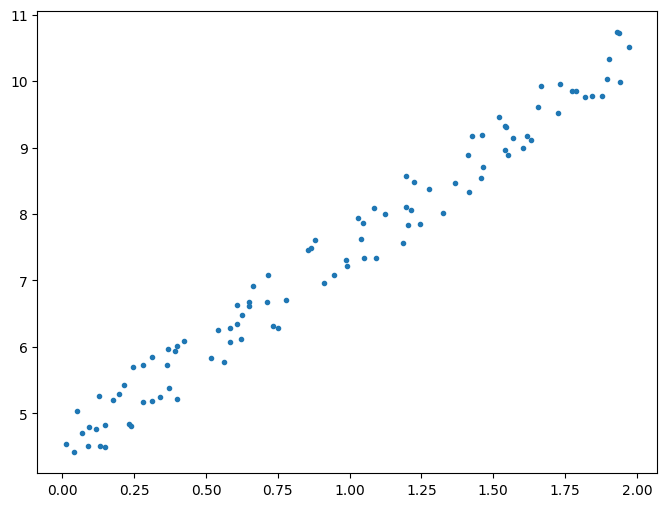

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

plt.plot(X,y, ".")

plt.show()

theta_best = value that minimazies the cost function

y = vector of target values

theta_best = (X.T * X)^-1 * X.T * y

In [28]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)# add 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [29]:
X[:2]

array([[0.74908024],
       [1.90142861]])

In [30]:
X_b[:2]

array([[1.        , 0.74908024],
       [1.        , 1.90142861]])

Theta[0] is bias. (intercept) (pl:wyraz wolny)

Theta[1] is slope coefficinet (pl: wspolczynnik kierunkowy)

In [31]:
theta_best

array([[4.51359766],
       [2.98323418]])

Thats close to thats what we used to generate the data is y = 4 + 3*x + Gaussian noise

In [56]:
X_new = np.array([[0], [2]]) # to jest zasieg dla ktorego obliczam te moja funkcje

X_new_b = add_dummy_feature(X_new)


In [52]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [53]:
y_predict = X_new_b @ theta_best

In [54]:
y_predict

array([[ 4.51359766],
       [10.48006601]])

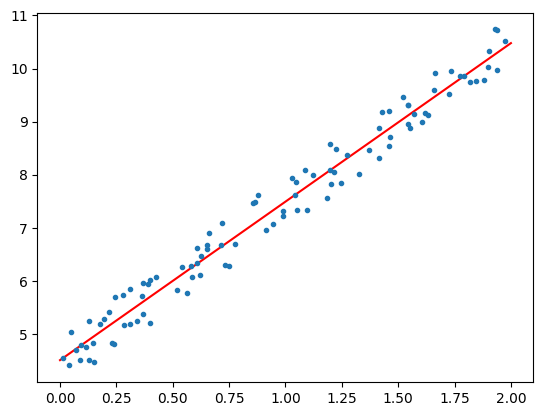

In [55]:
plt.plot(X_new, y_predict, "r-", label="Predictions")

plt.plot(X,y, ".")
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [61]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

WOW XD

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

residuals: To wektor reszt, czyli różnica między wartościami rzeczywistymi a przewidywanymi.

rank: Rząd macierzy X_b

In [62]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [63]:
residuals

array([8.49565526])

In [64]:
rank

2

In [65]:
s

array([14.37020392,  4.11961067])

In [66]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

#Gradient Descent

##Batch Gradient Descent

In [69]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [70]:
theta

array([[4.51359766],
       [2.98323418]])

Additionally

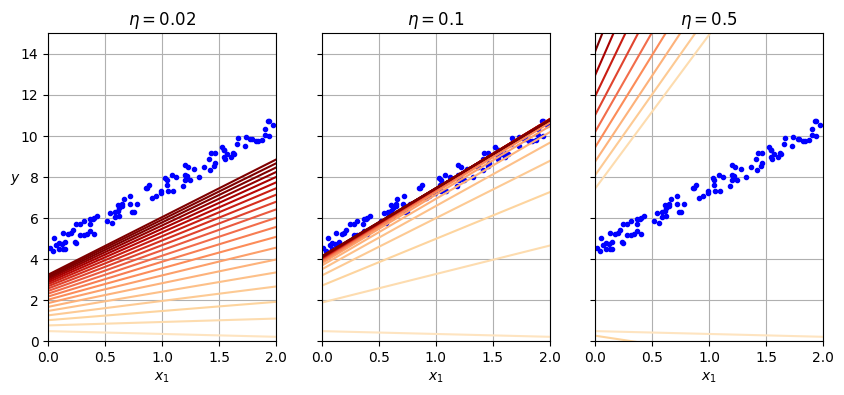

In [71]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent